In [10]:
import pandas as  pd
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
import warnings
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
import re
from sklearn.metrics import classification_report
import string
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier


df = pd.read_csv("denemeson.csv",index_col=0)

In [11]:
df.columns

Index(['league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'home_player_1', 'home_player_2', 'home_player_3',
       'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
       'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
       'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
       'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
       'away_player_9', 'away_player_10', 'away_player_11', 'B365H', 'B365D',
       'B365A', 'label', 'home_win_rate', 'home_team_name', 'away_team_name',
       'year', 'bahis'],
      dtype='object')

In [12]:
x = df.drop([ 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal','year','away_team_name', 'home_team_name',"label"],axis=1).values

y = df["label"].values

In [13]:
x[0]

array([78.  , 75.  , 77.  , 57.  , 70.  , 73.  , 64.  , 75.  , 64.  ,
       71.  , 64.  , 67.  , 67.  , 78.  , 75.  , 76.  , 76.  , 71.  ,
       80.  , 76.  , 73.  , 67.  ,  2.15,  3.1 ,  3.6 ,  0.  ,  1.  ])

In [14]:
scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.2,random_state= 41)

In [15]:
prop = model.predict_proba(x_test)
prop

NameError: name 'model' is not defined

In [16]:
mnb = MultinomialNB(alpha=0.01) # Çok sınıflı problemlerde kullanılır.
knn = KNeighborsClassifier(3)
svc = LinearSVC(random_state=44)
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',)#
tree = DecisionTreeClassifier()
sgd = SGDClassifier(alpha=0.01,random_state=44)
kmeans = KMeans(n_clusters=3, random_state=0)
xgb = XGBClassifier()

In [17]:
models=[mnb,svc,rfc,tree,sgd,knn,xgb]
best_acc=0
selected=models[0]
for count,model in enumerate(models):

    model=model.fit(x_train,y_train)
    accuracy=accuracy_score(y_test,model.predict(x_test))
    print(f"Model : {models[count]} \n Accuracy : {accuracy} \n")
    if accuracy>best_acc:
        best_acc=accuracy
        selected=model
#     except Exception:
#         continue
print("Best Accuracy :" + str(best_acc))
print("Selected Model : " + str(selected))

Model : MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True) 
 Accuracy : 0.501151189562548 

Model : LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=44, tol=0.0001,
          verbose=0) 
 Accuracy : 0.5425940138142747 

Model : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
 Accuracy : 0.47198772064466615 

Model : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
         

In [18]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
xgb.score(x_train,y_train)

0.5486119994882948

In [20]:
xgb.score(x_test,y_test)

0.5367101560501407

In [129]:
df.head()

,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_11,B365H,B365D,B365A,label,home_win_rate,home_team_name,away_team_name,year,bahis
country_id,,,,,,,,,,,,,,,,,,,,,
4769,4769,2008/2009,1,2008-08-09 00:00:00,483135,8481,8639,0,0,78.0,...,67.0,2.15,3.10,3.60,0,0,AS Nancy-Lorraine,LOSC Lille,2008,1.0
19694,19694,2008/2009,1,2008-08-09 00:00:00,489982,9860,9927,3,2,63.0,...,72.0,2.00,3.25,3.25,1,0,Heart of Midlothian,Motherwell,2008,1.0
4769,4769,2008/2009,1,2008-08-09 00:00:00,483138,9873,9853,1,0,79.0,...,76.0,2.40,3.10,3.10,1,0,Valenciennes FC,AS Saint-Étienne,2008,1.0
4769,4769,2008/2009,1,2008-08-09 00:00:00,483137,9874,9855,1,2,67.0,...,60.0,1.91,3.20,4.33,2,0,FC Sochaux-Montbéliard,Grenoble Foot 38,2008,1.0
4769,4769,2008/2009,1,2008-08-09 00:00:00,483134,9829,9847,1,0,69.0,...,67.0,2.40,3.10,3.10,1,0,AS Monaco,Paris Saint-Germain,2008,1.0


In [134]:
x = df.drop([ 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal','year','away_team_name', 'home_team_name'],axis=1)

In [135]:
df.home_win_rate.value_counts()

0    11649
1     7894
Name: home_win_rate, dtype: int64

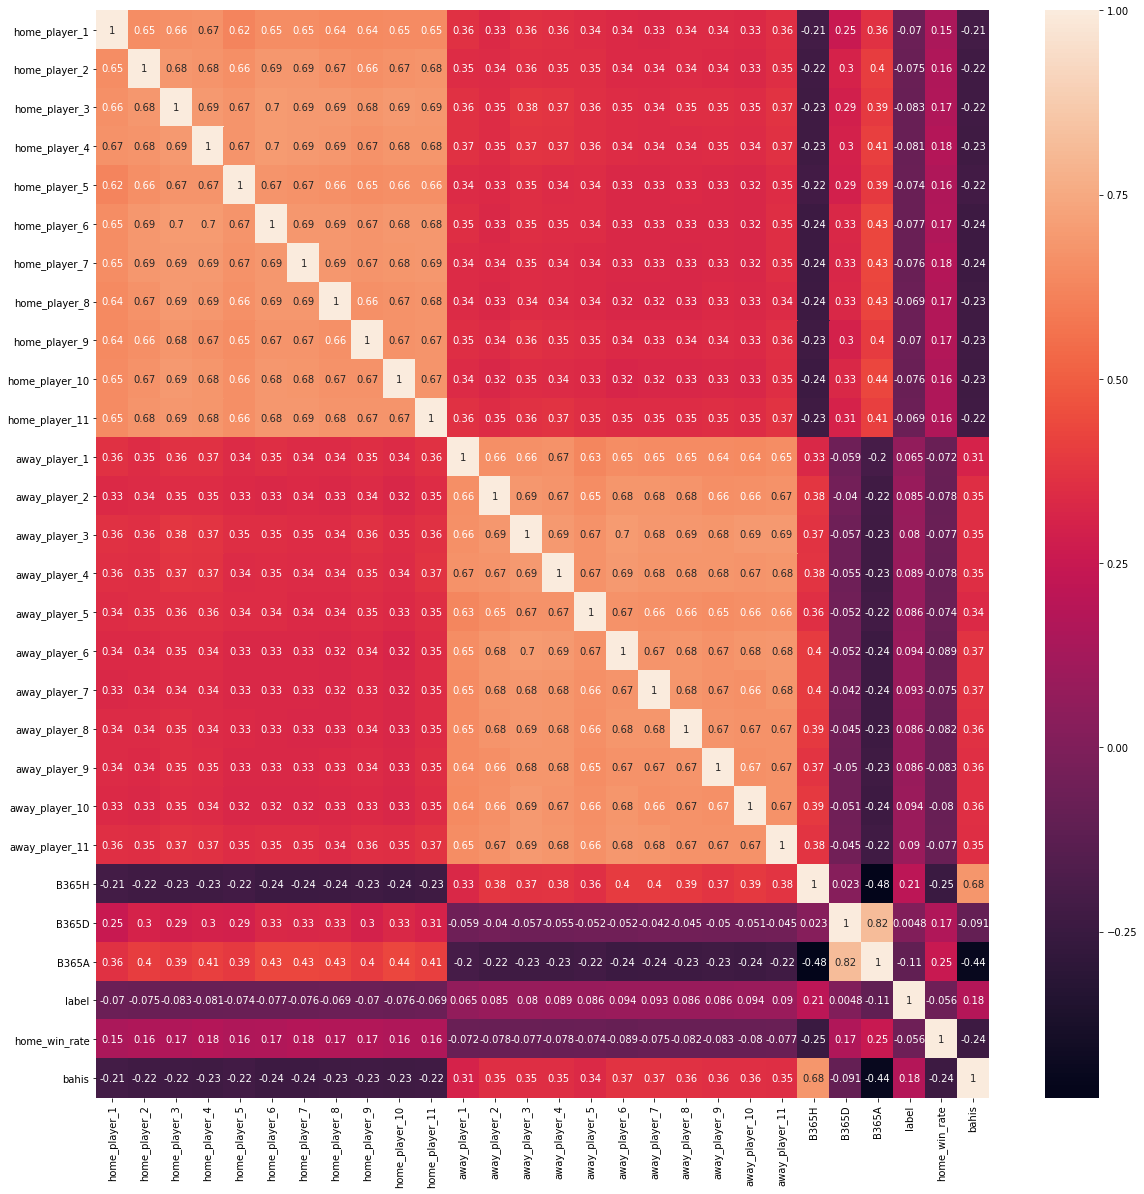

In [136]:
plt.figure(figsize=(20,20))
XGBClassifier
sns.heatmap(x.corr(),annot=True)

In [6]:
from sklearn.model_selection import GridSearchCV

clf = XGBClassifier(
        eval_metric = 'auc',
        num_class = 3,
        nthread = 4,
        silent = 1,
        )
parameters = {
    'num_boost_round': [100, 250, 500],
    'eta': [0.05, 0.1, 0.3],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}
clf = GridSearchCV(clf, parameters, cv=2)

In [7]:
clf.fit(x_train,y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='auc',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     num_class=3, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=1,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.9, 1.0],
                         'eta': [0.05, 0.1, 0.3